# Import dependencies

In [18]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

# Functions

In [19]:
def plot_region(df, regione):
    df_regione = df[df["denominazione_regione"] == regione]
    province = list(df_regione["denominazione_provincia"].unique())
    
    plt.rcParams.update({"legend.fontsize": "x-large",
                         "figure.figsize": (20, 15),
                         'xtick.labelsize': 10})
    ax = plt.gca()
    formatter = mdates.DateFormatter("%m-%d")
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.DayLocator()
    ax.xaxis.set_major_locator(locator)

    for i in range(len(province)):
        query = 'denominazione_provincia == "{}"'.format(province[i])
        df_provincia = df_regione.query(query)
        
        data = df_provincia["data"].values
        totale_casi = df_provincia["totale_casi"].values
        plt.plot(data, totale_casi, label=province[i])
    
    query = "denominazione_regione == '{}'".format(regione)
    totale_casi = (df.query(query)
                   .groupby(["data"])["totale_casi"]
                   .sum().values)
    plt.plot(data, totale_casi, label="Totale %s" % regione)
    
    plt.legend(loc="upper left")
    plt.show()    

# Load data

In [20]:
dati_province_fpath = "../../dati-province/dpc-covid19-ita-province.csv"
df = pd.read_csv(dati_province_fpath, sep=",")

In [21]:
df.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,NaN,NaN
1,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,NaN,NaN
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,NaN,NaN
3,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,NaN,NaN
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0,NaN,NaN


## Coverti data: string to datetime object

In [22]:
df.loc[:, "data"] = df.loc[:, "data"].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))

In [23]:
df.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,2020-02-24 18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,NaN,NaN
1,2020-02-24 18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,NaN,NaN
2,2020-02-24 18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,NaN,NaN
3,2020-02-24 18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,NaN,NaN
4,2020-02-24 18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0,NaN,NaN


# Totale per regione

In [24]:
df_totale_regione = (df[ df["data"] == df["data"].max() ]
                     .groupby(["denominazione_regione"], as_index=False)["totale_casi"].sum()
                     .sort_values(["totale_casi"], ascending=[False])) 

In [25]:
df_totale_regione

,denominazione_regione,totale_casi
8,Lombardia,43208
4,Emilia-Romagna,14074
13,Piemonte,9301
20,Veneto,9155
17,Toscana,4608
9,Marche,3825
7,Liguria,3416
6,Lazio,3095
3,Campania,2092
14,Puglia,1803


In [26]:
df_totale_regione["totale_casi"].sum()

105792

## Senza Lombardia

In [27]:
df_totale_regione = (df[ (df["data"] == df["data"].max()) & 
                         (df["denominazione_regione"] != "Lombardia") ]
                     .groupby(["denominazione_regione"], as_index=False)["totale_casi"].sum()
                     .sort_values(["totale_casi"], ascending=[False])) 

In [28]:
df_totale_regione["totale_casi"].sum()

62584

# Andamento Lombardia

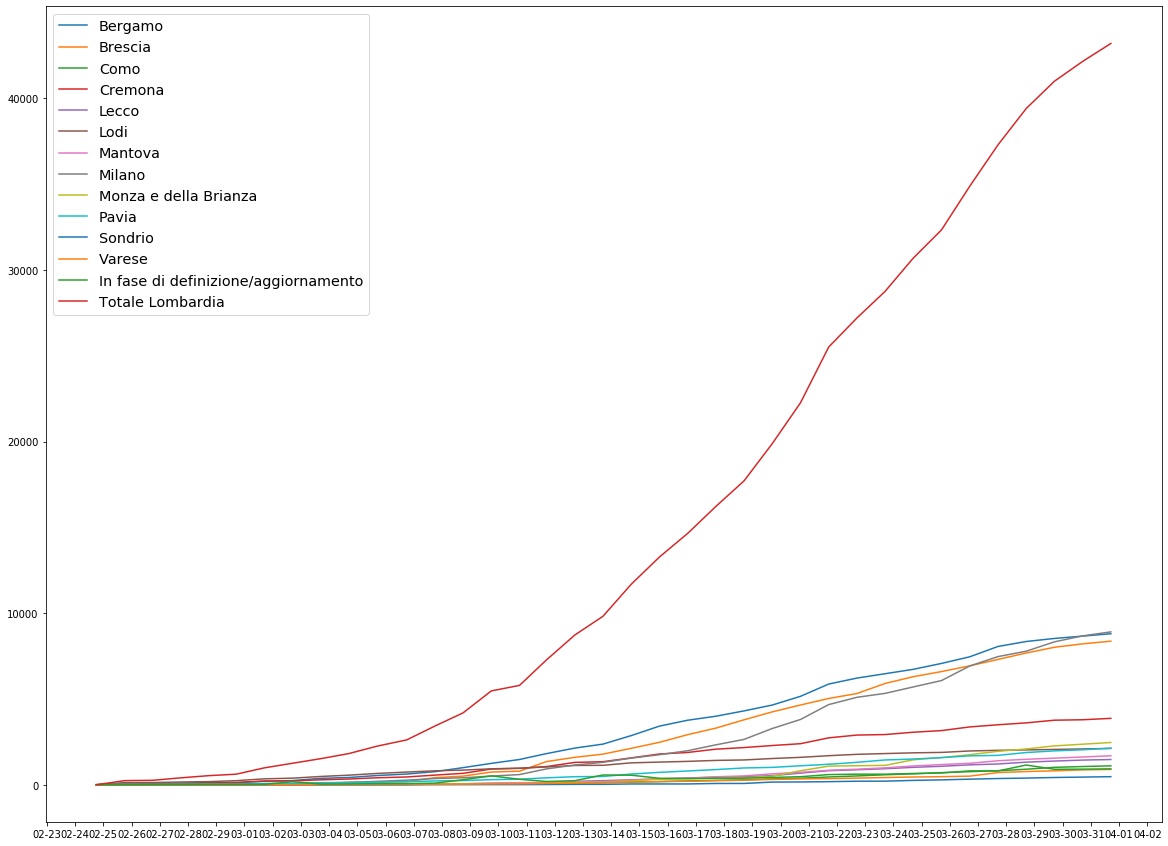

In [29]:
plot_region(df, "Lombardia")

# Andamento Emilia Romagna

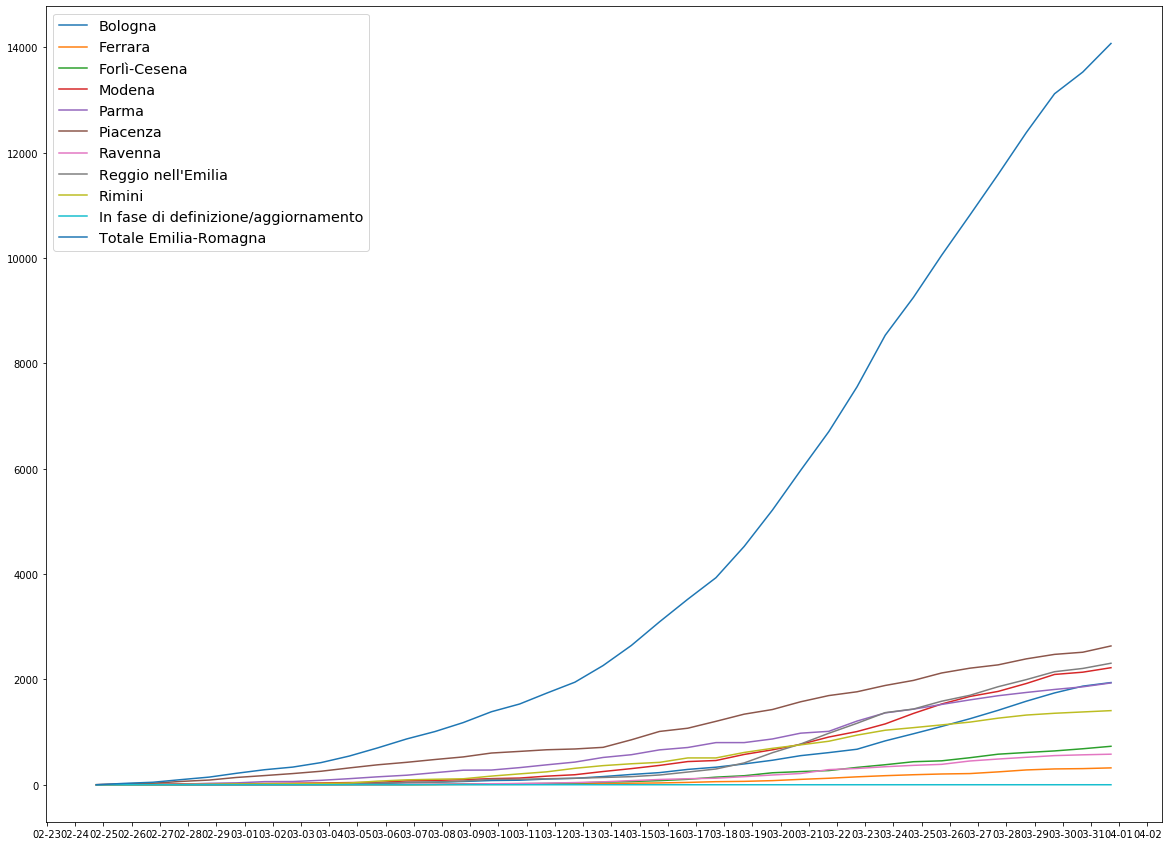

In [30]:
plot_region(df, "Emilia-Romagna")

# Andamento Veneto

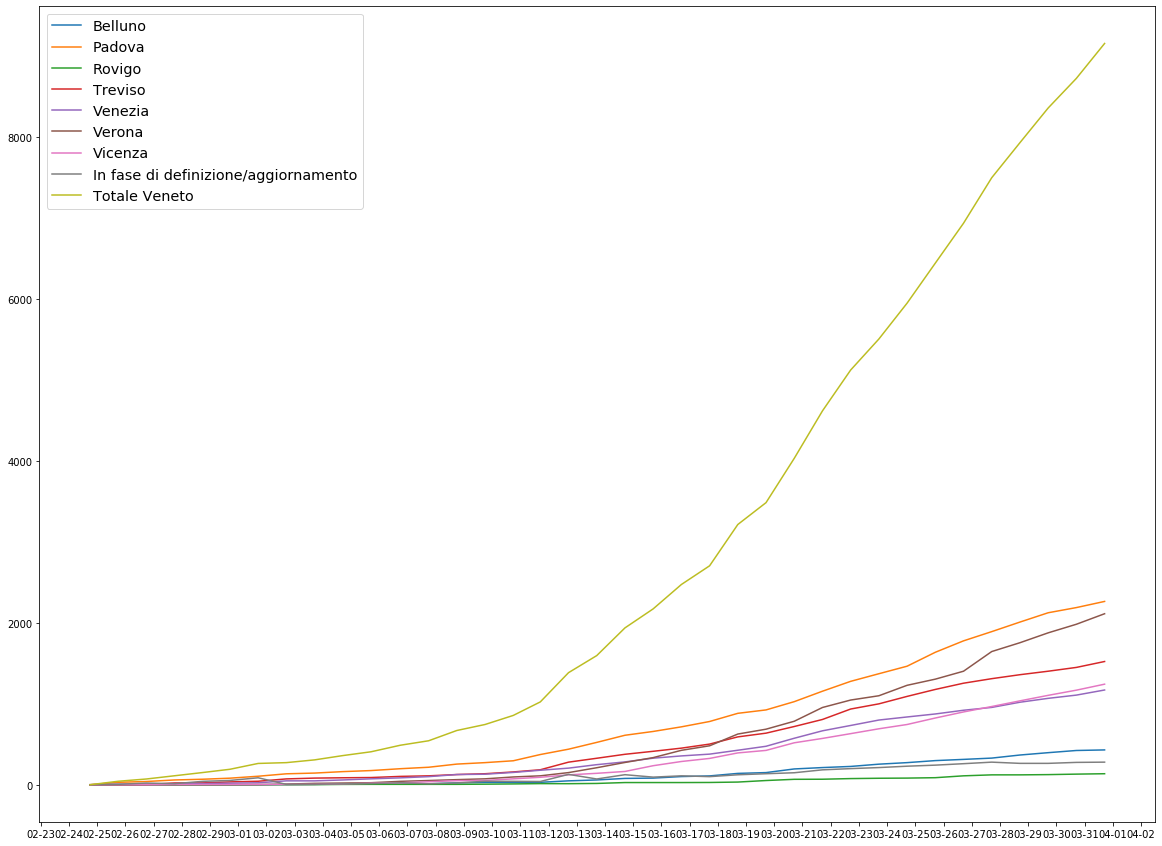

In [31]:
plot_region(df, "Veneto")

# Andamento Sardegna

In [32]:
df_province = (df[(df["data"] == df["data"].max()) & 
         (df["denominazione_regione"] == "Sardegna")][["denominazione_provincia", "totale_casi"]]
     )

In [33]:
df_province

,denominazione_provincia,totale_casi
4694,Cagliari,111
4695,Nuoro,57
4696,Oristano,10
4697,Sassari,486
4698,Sud Sardegna,58
4699,In fase di definizione/aggiornamento,0


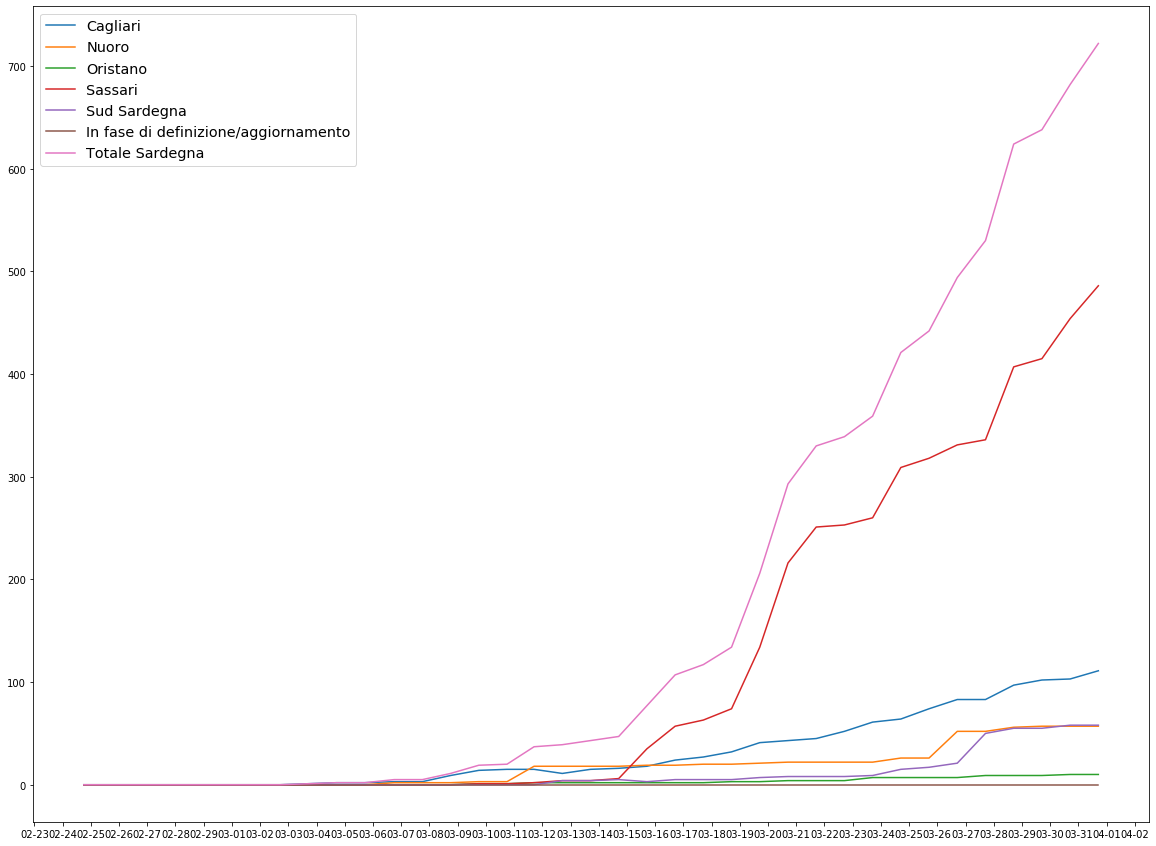

In [34]:
plot_region(df, "Sardegna")